## Dominos case study

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('diminos_data.csv')
df

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


In [6]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


* order_placed_at and order_delivered_at are in object datatype,but it should be in datetime format.

In [20]:
df.describe()

,order_id,order_placed_at,order_delivered_at
count,1.500000e+04,15000,15000
mean,1.530610e+06,2023-03-14 10:49:21.257533184,2023-03-14 11:09:51.220893184
min,1.523111e+06,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
25%,1.526861e+06,2023-03-07 15:57:25,2023-03-07 16:20:38.480371200
50%,1.530610e+06,2023-03-14 09:32:06.500000,2023-03-14 09:55:10.638778880
75%,1.534360e+06,2023-03-21 07:07:15.500000,2023-03-21 07:25:22.135336704
max,1.538110e+06,2023-03-27 23:58:20,2023-03-29 02:42:50.645252
std,4.330271e+03,NaN,NaN


In [22]:
df.isnull().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [24]:
# Convert to datetime
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


Now,order_placed_at and order_delivered_at are in datetime format.

In [29]:
# Delivery time in minutes
df["delivery_time_min"] = (df["order_delivered_at"] - df["order_placed_at"]).dt.total_seconds() / 60

In [31]:
# 95th percentile
p95 = df["delivery_time_min"].quantile(0.95)

In [33]:
# Percentage within 31 mins
within_31 = (df["delivery_time_min"] <= 31).mean() * 100

p95, within_31

(27.261043996666658, 96.28666666666666)

### Distribution of Delivery time

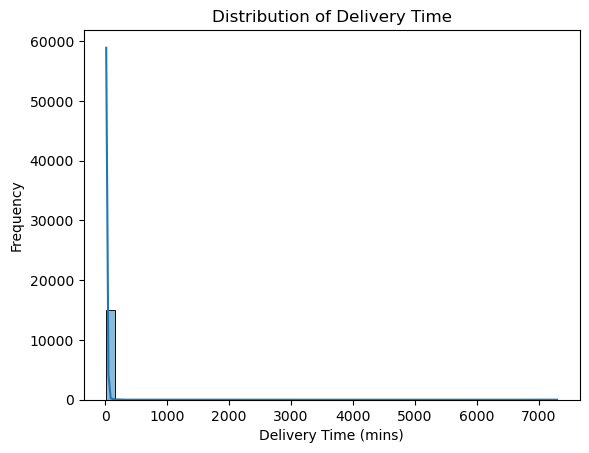

In [37]:
sns.histplot(df['delivery_time_min'],bins = 50,kde = True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (mins)')
plt.ylabel('Frequency')
plt.show()

### Orders Over Time
* To identify the no.of orders 

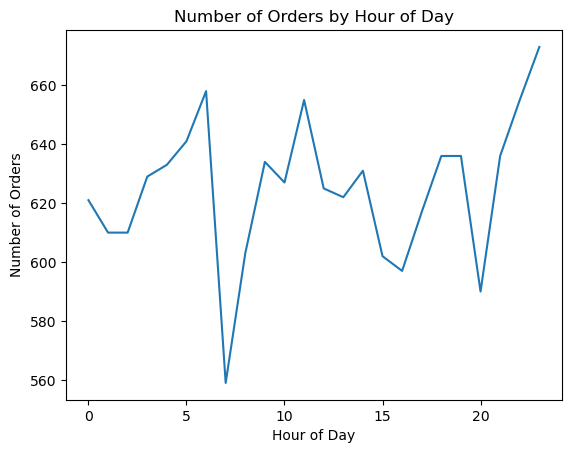

In [40]:
df['order_hour'] = df['order_placed_at'].dt.hour
orders_by_hour = df['order_hour'].value_counts().sort_index()

sns.lineplot(x=orders_by_hour.index, y=orders_by_hour.values)
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

* This shows that orders are consistent during day time and increased during late night (around 22:00 - 23:00)

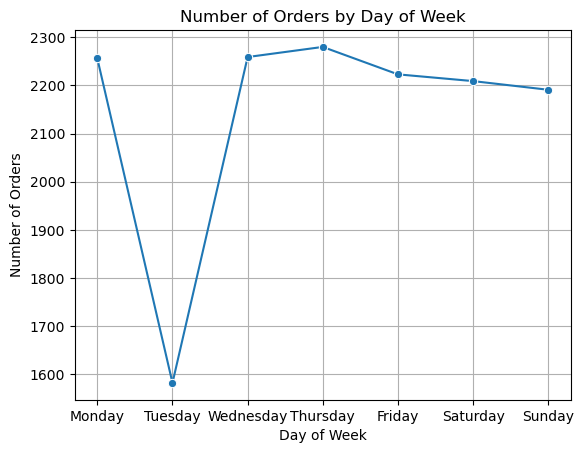

In [45]:
df['order_day_of_week'] = df['order_placed_at'].dt.day_name()
orders_by_day = df['order_day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sns.lineplot(x=orders_by_day.index, y=orders_by_day.values, marker='o')
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.grid(True)

In [55]:
longest_deliveries = df.sort_values(by='delivery_time_min', ascending=False).head(10)
print('Top 10 orders with the longest delivery times:')
print(longest_deliveries[['order_id', 'order_placed_at', 'order_delivered_at', 'delivery_time_min']])

Top 10 orders with the longest delivery times:
       order_id     order_placed_at         order_delivered_at  \
5499    1528610 2023-03-10 17:06:22 2023-03-15 18:46:11.882496   
4165    1527276 2023-03-08 09:46:43 2023-03-12 11:34:09.085175   
10225   1533336 2023-03-19 11:07:32 2023-03-22 13:53:25.472592   
14155   1537266 2023-03-26 09:54:24 2023-03-29 02:42:50.645252   
10007   1533118 2023-03-19 00:56:34 2023-03-21 00:59:41.454974   
11944   1535055 2023-03-22 12:50:53 2023-03-23 08:03:40.654492   
1361    1524472 2023-03-03 10:04:13 2023-03-04 03:51:02.368715   
5109    1528220 2023-03-10 01:04:58 2023-03-10 14:13:37.181329   
117     1523228 2023-03-01 04:59:04 2023-03-01 18:06:52.046891   
1910    1525021 2023-03-04 10:41:17 2023-03-04 23:20:15.509579   

       delivery_time_min  
5499         7299.831375  
4165         5867.434753  
10225        4485.891210  
14155        3888.444088  
10007        2883.124250  
11944        1152.794242  
1361         1066.822812  
5109      

### Insights
* Majority of deliveries are completed before 31 mins(approx.96.28%)
* Very few extreme delays
* Long-tail delays (above 31 minutes) exist but do not impact the 95th percentile metric significantly